In [1]:
import logging
import yaml

import numpy as np
from matplotlib import pyplot as plt
import astropy.units as u
from astropy.time import Time
from astropy.coordinates import AltAz, ICRS, EarthLocation, Angle, FK5
import asyncio

# import palpy

from lsst.ts import salobj

from lsst.ts.standardscripts.auxtel.attcs import ATTCS

from lsst.ts.idl.enums import ATPtg

%matplotlib inline

# Start up

In [2]:
from astropy.utils import iers
iers.conf.auto_download = False

In [3]:
d = salobj.Domain()

In [4]:
atmcs = salobj.Remote(d, "ATMCS")
atptg = salobj.Remote(d, "ATPtg")
ataos = salobj.Remote(d, "ATAOS")
atpne = salobj.Remote(d, "ATPneumatics")
athex = salobj.Remote(d, "ATHexapod")
atdome = salobj.Remote(d, "ATDome", index=1)
atdomtraj = salobj.Remote(d, "ATDomeTrajectory")

In [5]:
await asyncio.gather(atmcs.start_task, 
                     atptg.start_task,
                     ataos.start_task,
                     atpne.start_task,
                     athex.start_task,
                     atdome.start_task,
                     atdomtraj.start_task)

AckCmdReader(ATPneumatics, 0, ackcmd) falling behind; read 10 messages


[None, None, None, None, None, None, None]

## ATMCS

In [80]:
await asyncio.sleep(5)

RemoteTelemetry(ATDome, 1, position) falling behind; read 100 messages
RemoteEvent(ATHexapod, 0, heartbeat) falling behind; read 45 messages
AckCmdReader(ATMCS, 0, ackcmd) falling behind; read 100 messages
falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements
falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements
RemoteTelemetry(ATPneumatics, 0, loadCell) falling behind; read 45 messages
RemoteEvent(ATPneumatics, 0, heartbeat) falling behind; read 45 messages
falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements
falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements
falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements


In [81]:
await salobj.set_summary_state(atmcs, salobj.State.ENABLED, timeout=120)

[<State.STANDBY: 5>, <State.DISABLED: 1>, <State.ENABLED: 2>]

## ATPtg

In [162]:
await atptg.tel_timeAndDate.next(flush=True, timeout=5)
await salobj.set_summary_state(atptg, salobj.State.ENABLED)

RemoteTelemetry(ATPneumatics, 0, loadCell) falling behind; read 86 messages
RemoteEvent(ATPneumatics, 0, heartbeat) falling behind; read 87 messages
falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements
falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements
falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements
falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements
falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements
falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements
falling behind; queue contains 99 elements
falling behind; queue contains 98 

[<State.FAULT: 3>, <State.STANDBY: 5>, <State.DISABLED: 1>, <State.ENABLED: 2>]

In [ ]:
for i in range(10):
    time = await atptg.tel_timeAndDate.next(flush=True, timeout=5)
    print(time)

In [20]:
await salobj.set_summary_state(atptg, salobj.State.STANDBY)

RemoteTelemetry(ATDome, 1, position) falling behind; read 100 messages
falling behind; queue contains 59 elements
falling behind; queue contains 58 elements
RemoteTelemetry(ATPtg, 0, timeAndDate) falling behind; read 100 messages
RemoteEvent(ATPtg, 0, mountDataWarning) falling behind; read 14 messages


[<State.ENABLED: 2>, <State.DISABLED: 1>, <State.STANDBY: 5>]

## ATAOS

In [ ]:
await ataos.evt_heartbeat.next(flush=True)
await ataos.cmd_setLogLevel.set_start(level=logging.DEBUG, timeout=10)
# await salobj.set_summary_state(ataos, salobj.State.STANDBY)
await salobj.set_summary_state(ataos, salobj.State.ENABLED, settingsToApply="measured_20190908.yaml")

In [ ]:
await ataos.cmd_enableCorrection.set_start(m1=True, timeout=10)

In [ ]:
await ataos.cmd_disableCorrection.set_start(m1=True, timeout=10)

In [ ]:
await salobj.set_summary_state(ataos, salobj.STANDBY)

## ATPneumatics

In [ ]:
await salobj.set_summary_state(atpne, salobj.State.ENABLED)

In [ ]:
await atpne.cmd_openM1Cover.start(timeout=30)

## ATDome

In [ ]:
await salobj.set_summary_state(atdome, salobj.State.ENABLED, settingsToApply="test.yaml")

In [ ]:
await atdome.cmd_moveAzimuth.set_start(azimuth=0., timeout=30)

In [ ]:
await atdome.cmd_homeAzimuth.start()

In [ ]:
err = await atdome.evt_errorCode.next(flush=False, timeout=1)
err = atdome.evt_errorCode.get()

In [ ]:
err.errorReport

## ATDomeTrajectory

In [ ]:
await salobj.set_summary_state(atdomtraj, salobj.State.ENABLED)

## ATHexapod

In [140]:
await salobj.set_summary_state(athex, salobj.State.ENABLED, settingsToApply="Default1")

RemoteEvent(ATDomeTrajectory, 0, heartbeat) falling behind; read 100 messages
falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements
falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements
falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements
falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements
falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements
falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements
falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements
falling behind; que

[<State.STANDBY: 5>, <State.DISABLED: 1>, <State.ENABLED: 2>]

In [209]:
tel = await athex.evt_positionUpdate.next(flush=False, timeout=2)

RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 100 messages


In [210]:
tel.positionX, tel.positionY, tel.positionZ, tel.positionU, tel.positionV

(-5.0, 0.0, 0.0, 0.35, 0.22)

In [235]:
await athex.cmd_moveToPosition.set_start(x=-4., y=1.,z=0.35, u=0.35, v=0.22)

AckCmdReader(ATMCS, 0, ackcmd) falling behind; read 100 messages
falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements
RemoteTelemetry(ATPtg, 0, currentTargetStatus) falling behind; read 67 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 100 messages
RemoteEvent(ATDome, 1, heartbeat) falling behind; read 14 messages
RemoteTelemetry(ATPneumatics, 0, loadCell) falling behind; read 14 messages
RemoteEvent(ATHexapod, 0, heartbeat) falling behind; read 13 messages
RemoteEvent(ATAOS, 0, heartbeat) falling behind; read 13 messages
RemoteTelemetry(ATMCS, 0, trajectory) falling behind; read 13 messages
RemoteTelemetry(ATMCS, 0, torqueDemand) falling behind; read 13 messages
RemoteEvent(ATAOS, 0, m1CorrectionStarted) falling behind; read 10 messages
RemoteTelemetry(ATPtg, 0, timeAndDate) falling behind; read 67 messages
RemoteTelemetry(ATHexapod, 0, positionStatus) falling behind; read 13 messag

In [236]:
await atptg.cmd_offsetAzEl.set_start(el=-15., az=0., num=1)

RemoteEvent(ATMCS, 0, target) falling behind; read 100 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 100 messages
RemoteTelemetry(ATPtg, 0, currentTargetStatus) falling behind; read 100 messages
RemoteEvent(ATDome, 1, heartbeat) falling behind; read 77 messages
RemoteTelemetry(ATPneumatics, 0, loadCell) falling behind; read 77 messages
RemoteEvent(ATHexapod, 0, heartbeat) falling behind; read 77 messages
RemoteEvent(ATAOS, 0, heartbeat) falling behind; read 77 messages
RemoteTelemetry(ATMCS, 0, trajectory) falling behind; read 77 messages
RemoteTelemetry(ATMCS, 0, torqueDemand) falling behind; read 77 messages
RemoteEvent(ATAOS, 0, m1CorrectionStarted) falling behind; read 58 messages
RemoteTelemetry(ATPneumatics, 0, mainAirSourcePressure) falling behind; read 78 messages
RemoteTelemetry(ATHexapod, 0, positionStatus) falling behind; read 77 messages
RemoteTelemetry(ATDome, 1, position) falling behind; read 100 messages
RemoteTelemetry(ATPtg, 0, timeAndDate)

In [240]:
await atptg.cmd_offsetAzEl.set_start(el=15., az=0., num=1)

RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 80 messages
falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements
RemoteTelemetry(ATPtg, 0, timeAndDate) falling behind; read 20 messages
falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements


In [244]:
await atptg.cmd_offsetAzEl.set_start(el=0., az=-15., num=1)

RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 100 messages
RemoteTelemetry(ATPtg, 0, timeAndDate) falling behind; read 89 messages
RemoteTelemetry(ATDome, 1, position) falling behind; read 88 messages
falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements
RemoteEvent(ATHexapod, 0, heartbeat) falling behind; read 17 messages
falling behind; queue contains 39 elements


falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements


In [139]:
await salobj.set_summary_state(athex, salobj.State.STANDBY)

[<State.STANDBY: 5>]

falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements
RemoteEvent(ATHexapod, 0, heartbeat) falling behind; read 100 messages


## Slewing/Tracking

In [ ]:
attcs = ATTCS(atmcs=atmcs, 
              atptg=atptg, 
              ataos=ataos, 
              atpneumatics=atpne, 
              athexapod=athex, 
              atdome=atdome, 
              atdometrajectory=atdomtraj, 
              check={"atpneumatics": False, "athexapod": False, "atdome": True, "atdometrajectory": True})

In [6]:
location = EarthLocation.from_geodetic(lon=-70.747698*u.deg,
                                       lat=-30.244728*u.deg,
                                       height=2663.0*u.m)

In [7]:
ra = Angle("16:57:59", unit=u.hour)
dec = Angle("-22:21:29", unit=u.deg)
target_name="Jupiter"
radec = ICRS(ra, dec)

In [65]:

radec = ICRS(ra, dec)

# Figure out what is the rotPA that sets nasmith rotator close to zero.
time_data = await atptg.tel_timeAndDate.next(flush=True, timeout=2)
curr_time_atptg = Time(time_data.tai, format="mjd", scale="tai")
print(curr_time_atptg)
coord_frame_altaz = AltAz(location=location, obstime=curr_time_atptg)
alt_az = radec.transform_to(coord_frame_altaz)

print("slew...")
# await atmcs.cmd_startTracking.start(timeout=10)
await attcs.slew(ra=radec.ra.hour, 
                 dec=radec.dec.deg,
                 rotPA=180.-alt_az.alt.deg,
                 rot_frame=ATPtg.RotFrame.FIXED,
                 rot_mode=ATPtg.RotMode.FIELD)

RemoteEvent(ATHexapod, 0, heartbeat) falling behind; read 40 messages
RemoteEvent(ATDomeTrajectory, 0, heartbeat) falling behind; read 40 messages
falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements


58738.007631786604
slew...


NameError: name 'attcs' is not defined

In [104]:
await atptg.cmd_offsetAzEl.set_start(el=30., az=0.,num=1)

falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements
AckCmdReader(ATPneumatics, 0, ackcmd) falling behind; read 32 messages
falling behind; queue contains 31 elements
RemoteTelemetry(ATPtg, 0, timeAndDate) falling behind; read 71 messages
RemoteEvent(ATAOS, 0, m1CorrectionStarted) falling behind; read 10 messages
RemoteEvent(ATDomeTrajectory, 0, heartbeat) falling behind; read 14 messages
RemoteEvent(ATAOS, 0, logMessage) falling behind; read 10 messages
RemoteEvent(ATAOS, 0, detailedState) falling behind; read 21 messages
falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements


falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements


In [ ]:
await atptg.cmd_offsetAzEl.set_start(el=-250.)

In [116]:
await atptg.cmd_offsetAzEl.set_start(el=0., az=-30., num=1)

falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements
falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements
falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements
falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements


falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements


In [106]:
await atptg.cmd_offsetAbsorb.set_start(num=2,timeout=10)

falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements
falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements
RemoteTelemetry(ATPtg, 0, timeAndDate) falling behind; read 100 messages
RemoteTelemetry(ATPtg, 0, mountStatus) falling behind; read 100 messages
RemoteTelemetry(ATMCS, 0, trajectory) falling behind; read 82 messages
RemoteTelemetry(ATPtg, 0, guidingAndOffsets) falling behind; read 100 messages
RemoteTelemetry(ATMCS, 0, torqueDemand) falling behind; read 82 messages
RemoteTelemetry(ATPtg, 0, currentTimesToLimits) falling behind; read 16 messages
RemoteTelemetry(ATPtg, 0, currentTargetStatus) falling behind; read 100 messages
falling behind; queue contains 88 elements
falling behind; queue contains 87 elements
falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 eleme

AckError: msg='Command failed', ackcmd=(ackcmd private_seqNum=913121861, ack=<SalRetCode.CMD_FAILED: -302>, error=6611, result='Rejected : Invalid offset number')

In [ ]:
await atptg.cmd_exitControl.start()

In [10]:
await atmcs.cmd_startTracking.start(timeout=30)

AckCmdReader(ATPneumatics, 0, ackcmd) falling behind; read 82 messages
RemoteEvent(ATDomeTrajectory, 0, heartbeat) falling behind; read 36 messages
falling behind; queue contains 81 elements
falling behind; queue contains 80 elements
RemoteTelemetry(ATDome, 1, position) falling behind; read 100 messages
RemoteTelemetry(ATPtg, 0, mountStatus) falling behind; read 100 messages
RemoteTelemetry(ATPtg, 0, guidingAndOffsets) falling behind; read 100 messages
RemoteTelemetry(ATPtg, 0, currentTargetStatus) falling behind; read 100 messages
RemoteEvent(ATPneumatics, 0, m1SetPressure) falling behind; read 27 messages


In [83]:
# Figure out what is the rotPA that sets nasmith rotator close to zero.
time_data = await atptg.tel_timeAndDate.next(flush=True, timeout=2)
curr_time_atptg = Time(time_data.tai, format="mjd", scale="tai")
print(curr_time_atptg)
coord_frame_altaz = AltAz(location=location, obstime=curr_time_atptg)
alt_az = radec.transform_to(coord_frame_altaz)

print("slew...")
# await atmcs.cmd_startTracking.start(timeout=10)
await atptg.cmd_raDecTarget.set_start(
    targetName=target_name,
    targetInstance=ATPtg.TargetInstances.CURRENT,
    frame=ATPtg.CoordFrame.ICRS,
    epoch=2000,  # should be ignored: no parallax or proper motion
    equinox=2000,  # should be ignored for ICRS
    ra=radec.ra.hour,
    declination=radec.dec.deg,
    parallax=0,
    pmRA=0,
    pmDec=0,
    rv=0,
    dRA=0,
    dDec=0,
    rotPA=180.-alt_az.alt.deg,
    rotFrame=ATPtg.RotFrame.FIXED,
    rotMode=ATPtg.RotMode.FIELD,
    timeout=10
)

RemoteEvent(ATAOS, 0, logMessage) falling behind; read 49 messages
AckCmdReader(ATPneumatics, 0, ackcmd) falling behind; read 100 messages
RemoteEvent(ATMCS, 0, heartbeat) falling behind; read 64 messages
RemoteTelemetry(ATDome, 1, position) falling behind; read 100 messages
RemoteTelemetry(ATPtg, 0, timeAndDate) falling behind; read 100 messages
RemoteEvent(ATHexapod, 0, heartbeat) falling behind; read 64 messages
RemoteEvent(ATDomeTrajectory, 0, heartbeat) falling behind; read 64 messages
falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements
RemoteEvent(ATAOS, 0, m1CorrectionStarted) falling behind; read 49 messages
RemoteEvent(ATAOS, 0, m1CorrectionCompleted) falling behind; read 49 messages
RemoteTelemetry(ATPneumatics, 0, mainAirSourcePressure) falling behind; read 65 messages
RemoteEvent(ATAOS, 0, heartbeat) falling behind; read 64 messages
RemoteTelemetry(ATPneumatics, 0, m2AirPressure) falling behind; re

58738.01511814768
slew...


RemoteTelemetry(ATPneumatics, 0, loadCell) falling behind; read 65 messages
RemoteTelemetry(ATPtg, 0, currentTimesToLimits) falling behind; read 12 messages
RemoteEvent(ATPneumatics, 0, m1SetPressure) falling behind; read 49 messages
RemoteTelemetry(ATPtg, 0, currentTargetStatus) falling behind; read 100 messages
RemoteEvent(ATPneumatics, 0, heartbeat) falling behind; read 65 messages
falling behind; queue contains 46 elements


In [114]:
off = await atptg.tel_guidingAndOffsets.next(flush=True, timeout=5)

RemoteEvent(ATHexapod, 0, heartbeat) falling behind; read 20 messages
falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements
RemoteEvent(ATDome, 1, heartbeat) falling behind; read 19 messages
falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements


In [117]:
off.userOffsetDec, off.handsetOffsetDec, off.userOffsetRA, off.handsetOffsetRA

(391.324469084336, -210.32894732867896, 67.73606477165536, 99.72068663700009)

# alf Sco

In [148]:
ra = Angle("16:29:24.45970"  , unit=u.hour)
dec = Angle("-26:25:55.2094", unit=u.deg)
target_name="alf Sco"
radec = ICRS(ra, dec)



In [149]:
# Figure out what is the rotPA that sets nasmith rotator close to zero.
time_data = await atptg.tel_timeAndDate.next(flush=True, timeout=2)
curr_time_atptg = Time(time_data.tai, format="mjd", scale="tai")
print(curr_time_atptg)
coord_frame_altaz = AltAz(location=location, obstime=curr_time_atptg)
alt_az = radec.transform_to(coord_frame_altaz)

print("slew...")
# await atmcs.cmd_startTracking.start(timeout=10)
await atptg.cmd_raDecTarget.set_start(
    targetName=target_name,
    targetInstance=ATPtg.TargetInstances.CURRENT,
    frame=ATPtg.CoordFrame.ICRS,
    epoch=2000,  # should be ignored: no parallax or proper motion
    equinox=2000,  # should be ignored for ICRS
    ra=radec.ra.hour,
    declination=radec.dec.deg,
    parallax=0,
    pmRA=0,
    pmDec=0,
    rv=0,
    dRA=0,
    dDec=0,
    rotPA=180.-alt_az.alt.deg,
    rotFrame=ATPtg.RotFrame.FIXED,
    rotMode=ATPtg.RotMode.FIELD,
    timeout=10
)

falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements
falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements


58738.08343352355
slew...


falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements
falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements
falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements


## kap Sco

In [ ]:
ra=
dec=

In [163]:
ra = Angle("17:42:29.27520" , unit=u.hour)
dec = Angle("-39:01:47.9391", unit=u.deg)
target_name="Kap Sco"
radec = ICRS(ra, dec)

In [183]:
# Figure out what is the rotPA that sets nasmith rotator close to zero.
time_data = await atptg.tel_timeAndDate.next(flush=True, timeout=2)
curr_time_atptg = Time(time_data.tai, format="mjd", scale="tai")
print(curr_time_atptg)
coord_frame_altaz = AltAz(location=location, obstime=curr_time_atptg)
alt_az = radec.transform_to(coord_frame_altaz)

print("slew...")
# await atmcs.cmd_startTracking.start(timeout=10)
await atptg.cmd_raDecTarget.set_start(
    targetName=target_name,
    targetInstance=ATPtg.TargetInstances.CURRENT,
    frame=ATPtg.CoordFrame.ICRS,
    epoch=2000,  # should be ignored: no parallax or proper motion
    equinox=2000,  # should be ignored for ICRS
    ra=radec.ra.hour,
    declination=radec.dec.deg,
    parallax=0,
    pmRA=0,
    pmDec=0,
    rv=0,
    dRA=0,
    dDec=0,
    rotPA=180.-alt_az.alt.deg,
    rotFrame=ATPtg.RotFrame.FIXED,
    rotMode=ATPtg.RotMode.FIELD,
    timeout=10
)

falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements
RemoteTelemetry(ATDome, 1, position) falling behind; read 100 messages
RemoteTelemetry(ATPtg, 0, timeAndDate) falling behind; read 100 messages
RemoteTelemetry(ATPtg, 0, currentTimesToLimits) falling behind; read 20 messages


58738.096566960725
slew...


falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements
falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements
falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements
falling behind; queue contains 27 elements


In [160]:
await atptg.cmd_stopTracking.start(timeout=10)

RemoteTelemetry(ATDome, 1, position) falling behind; read 100 messages
falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements
RemoteTelemetry(ATHexapod, 0, positionStatus) falling behind; read 42 messages
RemoteTelemetry(ATPneumatics, 0, mainAirSourcePressure) falling behind; read 42 messages
RemoteEvent(ATAOS, 0, m1CorrectionCompleted) falling behind; read 32 messages
RemoteTelemetry(ATPneumatics, 0, m2AirPressure) falling behind; read 42 messages
RemoteEvent(ATPneumatics, 0, m1SetPressure) falling behind; read 32 messages
RemoteEvent(ATAOS, 0, detailedState) falling behind; read 64 messages
falling behind; queue contains 95 elements
falling behind; queue contains 94 elements
falling behind; queue contains 93 elements
falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements


falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements


In [182]:
# off.userOffsetDec, off.handsetOffsetDec, off.userOffsetRA, off.handsetOffsetRA
await atptg.cmd_offsetRADec.set_start(type=1, 
                                      off1=off.userOffsetRA+off.handsetOffsetRA,
                                      off2=off.userOffsetDec+off.handsetOffsetDec,
                                     num=0)

falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements
RemoteTelemetry(ATDome, 1, position) falling behind; read 100 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 100 messages
RemoteTelemetry(ATPtg, 0, timeAndDate) falling behind; read 100 messages
falling behind; queue contains 47 elements
RemoteTelemetry(ATHexapod, 0, positionStatus) falling behind; read 21 messages
RemoteTelemetry(ATPneumatics, 0, mainAirSourcePressure) falling behind; read 21 messages
RemoteTelemetry(ATPneumatics, 0, m2AirPressure) falling behind; read 21 messages
RemoteTelemetry(ATPneumatics, 0, m1AirPressure) falling behind; read 21 messages
RemoteTelemetry(ATPneumatics, 0, loadCell) falling behind; read 21 messages


In [171]:
await atptg.cmd_offsetAzEl.set_start(el=0., az=-250., num=1)

RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 100 messages
RemoteTelemetry(ATPtg, 0, currentTargetStatus) falling behind; read 78 messages
falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements
RemoteTelemetry(ATHexapod, 0, positionStatus) falling behind; read 15 messages
RemoteTelemetry(ATDome, 1, position) falling behind; read 77 messages
RemoteEvent(ATAOS, 0, m1CorrectionStarted) falling behind; read 11 messages
RemoteTelemetry(ATPtg, 0, timeAndDate) falling behind; read 78 messages
RemoteEvent(ATAOS, 0, logMessage) falling behind; read 11 messages
RemoteTelemetry(ATPtg, 0, mountStatus) falling behind; read 78 messages
RemoteEvent(ATAOS, 0, heartbeat) falling behind; read 15 messages
RemoteTelemetry(ATPtg, 0, guidingAndOffsets) falling behind; read 78 messages
AckCmdReader(ATPneumatics, 0, ackcmd) falling behind; read 36 messages
falling behind; queue contains 35 elements


In [207]:
await atptg.cmd_offsetAzEl.set_start(el=0., az=10., num=1)

falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 100 messages
RemoteTelemetry(ATDome, 1, position) falling behind; read 70 messages
RemoteTelemetry(ATMCS, 0, trajectory) falling behind; read 14 messages
RemoteTelemetry(ATPtg, 0, mountStatus) falling behind; read 72 messages
RemoteTelemetry(ATPtg, 0, guidingAndOffsets) falling behind; read 72 messages
falling behind; queue contains 32 elements
falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements


In [208]:
await atptg.cmd_offsetAzEl.set_start(el=-15., az=0., num=1)

RemoteTelemetry(ATPtg, 0, timeAndDate) falling behind; read 42 messages
falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements
falling behind; queue contains 17 elements
RemoteTelemetry(ATDome, 1, position) falling behind; read 41 messages


falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements


# GRID

In [44]:
async def wait_center():
    while True:
        opt = input("Center telescope and choose action (press ?<enter>, for list of actions): ")
        
        if opt == 'n':
            print("Next point in the grid...")
            return 1
        elif opt == 'p':
            print("Previous point in the grid...")
            return -1
        elif opt == 't':
            print("Stopping test...")
            return 0
        elif opt == '?':
            print("""Options are:
            n - Go to next point in the grid.
            p - Go to previous point in the grid.
            t - Terminate test.
            """)
        else:
            print("Next point in the grid...")
            return 1

In [189]:
dalt_grid = np.arange(-0.25, +0.35, 0.1)+0.6
daz_grid = np.arange(-0.25, +0.35, 0.1)-0.6

In [188]:
await atptg.cmd_offsetAzEl.set_start(el=0.6*60.*60., 
                                     az=-0.6*60*60, 
                                         num=0)

RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 100 messages
RemoteTelemetry(ATDome, 1, position) falling behind; read 61 messages
falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements
RemoteEvent(ATAOS, 0, detailedState) falling behind; read 18 messages
AckCmdReader(ATPneumatics, 0, ackcmd) falling behind; read 27 messages
falling behind; queue contains 26 elements


In [190]:
grid_alt = np.zeros(len(dalt_grid)*len(daz_grid))
grid_az = np.zeros(len(dalt_grid)*len(daz_grid))

for i in range(len(daz_grid)):
    grid_alt[i*len(dalt_grid):(i+1)*len(dalt_grid)] += dalt_grid[::(-1)**i]
    grid_az[i*len(dalt_grid):(i+1)*len(dalt_grid)] += daz_grid[i]

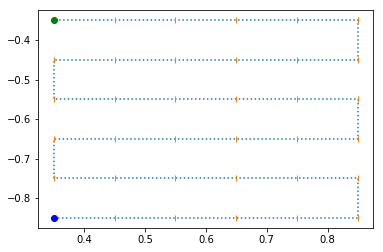

In [191]:
plt.plot(grid_alt, grid_az, ':')
plt.plot(grid_alt, grid_az, '|')
plt.plot(grid_alt[0], grid_az[0], 'bo')
plt.plot(grid_alt[-1], grid_az[-1], 'go')

In [192]:
start_from=0

In [193]:
print(f"Grid has {len(grid_alt)} pointings...")
print(f"Starting from {start_from}")

i = start_from
stop_at = 0

while i < len(grid_alt):
    
    print(f"GRID[{i}]: {grid_alt[i]} x {grid_az[i]}")

    await atptg.cmd_offsetAzEl.set_start(el=grid_alt[i]*60.*60., 
                                         az=grid_az[i]*60*60, 
                                         num=0)
    
    ret_val = await wait_center()

    if ret_val == 0:
        break
        
    i += ret_val
    
    if i < 0:
        print(f"Unwrapping index! (i={i})")
        i = 0

falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 100 messages
RemoteTelemetry(ATDome, 1, position) falling behind; read 100 messages
falling behind; queue contains 78 elements
falling behind; queue contains 77 elements
RemoteTelemetry(ATPtg, 0, timeAndDate) falling behind; read 100 messages
RemoteTelemetry(ATPtg, 0, mountStatus) falling behind; read 100 messages
RemoteTelemetry(ATPtg, 0, guidingAndOffsets) falling behind; read 100 messages
RemoteEvent(ATAOS, 0, m1CorrectionCompleted) falling behind; read 26 messages
RemoteEvent(ATAOS, 0, heartbeat) falling behind; read 33 messages


Grid has 36 pointings...
Starting from 0
GRID[0]: 0.35 x -0.85


falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements


Center telescope and choose action (press ?<enter>, for list of actions):  


RemoteTelemetry(ATDome, 1, position) falling behind; read 38 messages
falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements
RemoteEvent(ATAOS, 0, detailedState) falling behind; read 12 messages
RemoteTelemetry(ATPtg, 0, currentTargetStatus) falling behind; read 38 messages
falling behind; queue contains 17 elements


Next point in the grid...
GRID[1]: 0.44999999999999996 x -0.85


Center telescope and choose action (press ?<enter>, for list of actions):  


RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 35 messages
falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements


Next point in the grid...
GRID[2]: 0.55 x -0.85


Center telescope and choose action (press ?<enter>, for list of actions):  


RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 34 messages
falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements


Next point in the grid...
GRID[3]: 0.65 x -0.85


Center telescope and choose action (press ?<enter>, for list of actions):  


RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 34 messages
falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements


Next point in the grid...
GRID[4]: 0.75 x -0.85


Center telescope and choose action (press ?<enter>, for list of actions):  


falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements


Next point in the grid...
GRID[5]: 0.85 x -0.85


Center telescope and choose action (press ?<enter>, for list of actions):  


falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements


Next point in the grid...
GRID[6]: 0.85 x -0.75


Center telescope and choose action (press ?<enter>, for list of actions):  


falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 37 messages


Next point in the grid...
GRID[7]: 0.75 x -0.75


Center telescope and choose action (press ?<enter>, for list of actions):  


RemoteTelemetry(ATPtg, 0, currentTargetStatus) falling behind; read 11 messages
falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements
RemoteTelemetry(ATDome, 1, position) falling behind; read 10 messages
RemoteTelemetry(ATPtg, 0, mountStatus) falling behind; read 10 messages
RemoteTelemetry(ATPtg, 0, guidingAndOffsets) falling behind; read 10 messages


Next point in the grid...
GRID[8]: 0.65 x -0.75


Center telescope and choose action (press ?<enter>, for list of actions):  


RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 43 messages
falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements


Next point in the grid...
GRID[9]: 0.55 x -0.75


Center telescope and choose action (press ?<enter>, for list of actions):  


falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 47 messages


Next point in the grid...
GRID[10]: 0.44999999999999996 x -0.75


Center telescope and choose action (press ?<enter>, for list of actions):  


RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 41 messages
falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements


Next point in the grid...
GRID[11]: 0.35 x -0.75


Center telescope and choose action (press ?<enter>, for list of actions):  


falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 39 messages
falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements
falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements


Next point in the grid...
GRID[12]: 0.35 x -0.6499999999999999


Center telescope and choose action (press ?<enter>, for list of actions):  


RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 46 messages
falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements
falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements


Next point in the grid...
GRID[13]: 0.44999999999999996 x -0.6499999999999999


Center telescope and choose action (press ?<enter>, for list of actions):  


RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 37 messages
falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements


Next point in the grid...
GRID[14]: 0.55 x -0.6499999999999999


Center telescope and choose action (press ?<enter>, for list of actions):  


RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 38 messages
falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements
RemoteTelemetry(ATPtg, 0, timeAndDate) falling behind; read 10 messages


Next point in the grid...
GRID[15]: 0.65 x -0.6499999999999999


Center telescope and choose action (press ?<enter>, for list of actions):  


falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 44 messages


Next point in the grid...
GRID[16]: 0.75 x -0.6499999999999999


Center telescope and choose action (press ?<enter>, for list of actions):  


falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements


Next point in the grid...
GRID[17]: 0.85 x -0.6499999999999999


Center telescope and choose action (press ?<enter>, for list of actions):  


falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 45 messages
RemoteTelemetry(ATPtg, 0, mountStatus) falling behind; read 11 messages
RemoteTelemetry(ATPtg, 0, guidingAndOffsets) falling behind; read 11 messages


Next point in the grid...
GRID[18]: 0.85 x -0.5499999999999999


Center telescope and choose action (press ?<enter>, for list of actions):  


RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 100 messages
RemoteTelemetry(ATDome, 1, position) falling behind; read 45 messages
RemoteEvent(ATDome, 1, heartbeat) falling behind; read 10 messages
falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements
AckCmdReader(ATPneumatics, 0, ackcmd) falling behind; read 19 messages
falling behind; queue contains 18 elements


Next point in the grid...
GRID[19]: 0.75 x -0.5499999999999999


Center telescope and choose action (press ?<enter>, for list of actions):  


RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 44 messages
falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements
RemoteTelemetry(ATPtg, 0, timeAndDate) falling behind; read 11 messages


Next point in the grid...
GRID[20]: 0.65 x -0.5499999999999999


Center telescope and choose action (press ?<enter>, for list of actions):  


falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 49 messages
RemoteTelemetry(ATPtg, 0, mountStatus) falling behind; read 12 messages
RemoteTelemetry(ATPtg, 0, guidingAndOffsets) falling behind; read 12 messages


Next point in the grid...
GRID[21]: 0.55 x -0.5499999999999999


Center telescope and choose action (press ?<enter>, for list of actions):  


RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 44 messages
falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements
falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements


Next point in the grid...
GRID[22]: 0.44999999999999996 x -0.5499999999999999


Center telescope and choose action (press ?<enter>, for list of actions):  


RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 44 messages
falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements


Next point in the grid...
GRID[23]: 0.35 x -0.5499999999999999


Center telescope and choose action (press ?<enter>, for list of actions):  


RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 35 messages
falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements


Next point in the grid...
GRID[24]: 0.35 x -0.44999999999999996


Center telescope and choose action (press ?<enter>, for list of actions):  


falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 46 messages
RemoteTelemetry(ATPtg, 0, currentTargetStatus) falling behind; read 12 messages


Next point in the grid...
GRID[25]: 0.44999999999999996 x -0.44999999999999996


Center telescope and choose action (press ?<enter>, for list of actions):  


falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 38 messages


Next point in the grid...
GRID[26]: 0.55 x -0.44999999999999996


Center telescope and choose action (press ?<enter>, for list of actions):  


RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 40 messages
RemoteTelemetry(ATDome, 1, position) falling behind; read 10 messages
falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements
RemoteTelemetry(ATPtg, 0, mountStatus) falling behind; read 10 messages
RemoteTelemetry(ATPtg, 0, guidingAndOffsets) falling behind; read 10 messages


Next point in the grid...
GRID[27]: 0.65 x -0.44999999999999996


Center telescope and choose action (press ?<enter>, for list of actions):  


RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 41 messages
falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements
RemoteTelemetry(ATPtg, 0, currentTargetStatus) falling behind; read 10 messages


Next point in the grid...
GRID[28]: 0.75 x -0.44999999999999996


Center telescope and choose action (press ?<enter>, for list of actions):  


RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 43 messages
falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements


Next point in the grid...
GRID[29]: 0.85 x -0.44999999999999996


Center telescope and choose action (press ?<enter>, for list of actions):  


falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 41 messages
RemoteTelemetry(ATDome, 1, position) falling behind; read 10 messages


Next point in the grid...
GRID[30]: 0.85 x -0.35


Center telescope and choose action (press ?<enter>, for list of actions):  


RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 40 messages
falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements
falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements


Next point in the grid...
GRID[31]: 0.75 x -0.35


Center telescope and choose action (press ?<enter>, for list of actions):  


falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 40 messages
RemoteTelemetry(ATPtg, 0, timeAndDate) falling behind; read 10 messages


Next point in the grid...
GRID[32]: 0.65 x -0.35


Center telescope and choose action (press ?<enter>, for list of actions):  


RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 36 messages
falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements
falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements


Next point in the grid...
GRID[33]: 0.55 x -0.35


Center telescope and choose action (press ?<enter>, for list of actions):  t


Stopping test...


In [84]:
i=36
await atptg.cmd_offsetAzEl.set_start(el=grid_alt[i]*60.*60., 
                                     az=grid_az[i]*60*60, 
                                     num=0)



AckCmdReader(ATMCS, 0, ackcmd) falling behind; read 100 messages
RemoteEvent(ATHexapod, 0, heartbeat) falling behind; read 50 messages
falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements
falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements
RemoteEvent(ATDome, 1, heartbeat) falling behind; read 50 messages
falling behind; queue contains 11 elements
RemoteEvent(ATMCS, 0, heartbeat) falling behind; read 51 messages


falling behind; queue contains 99 elements
falling behind; queue contains 98 elements
falling behind; queue contains 97 elements


# Parking

In [ ]:
await asyncio.sleep(2.5)
atptg.evt_inPosition.flush()
await atptg.cmd_azElTarget.set_start(azDegs=0., elDegs=80.)
while True:
    inp = await atptg.evt_inPosition.next(flush=False, timeout=120.)
    if inp.inPosition:
        break

In [ ]:
await atptg.cmd_stopTracking.start()

In [ ]:
await salobj.set_summary_state(ataos, salobj.State.STANDBY)

In [ ]:
await asyncio.sleep(2.5)
ss = atptg.evt_summaryState.get()

In [ ]:
print(salobj.State(ss.summaryState))

In [ ]:
await asyncio.sleep(10.)

In [ ]:
await salobj.set_summary_state(atmcs, salobj.State.STANDBY, timeout=120)

In [ ]:
def mainValveCallback(data):
    print(data.state)

In [ ]:
atpne.evt_mainValveState.callback = mainValveCallback

In [ ]:
atpne.evt_mainValveState.callback = None

In [ ]:
await asyncio.sleep(10.)
# mv = atpne.evt_mainValveState.get()

In [ ]:
mv.state

In [ ]:
await atpne.cmd_closeMasterAirSupply.start(timeout=5)

In [ ]:
mv = await atpne.evt_mainValveState.next(flush=False, timeout=2)

In [ ]:
print(mv)

In [ ]:
mv.state, mv.private_sndStamp

In [ ]:
mv = atpne.evt_mainValveState.get()

In [ ]:
print(mv)

In [ ]:
mv.state, mv.private_sndStamp

In [ ]:
await atpne.cmd_openMasterAirSupply.start(timeout=5)

In [ ]:
mv = await atpne.evt_instrumentState.next(flush=False, timeout=2)

In [ ]:
mv.state

In [ ]:
await atpne.cmd_openInstrumentAirValve.start(timeout=5)

In [ ]:
try:
    await atpne.cmd_m1OpenAirValve.start(timeout=10)
except salobj.AckError as e:
    if e.ackcmd.ack == salobj.SalRetCode.CMD_NOPERM:
        print(e)
    else:
        raise e

In [ ]:
await asyncio.sleep(10.)

In [ ]:
await atdomtraj.cmd_start.start()

In [ ]:
await asyncio.sleep(1.)
atpne.evt_m1State.flush()
await atpne.cmd_m1OpenAirValve.start(timeout=10)
m1state = await atpne.evt_m1State.next(flush=False, timeout=10)
print(m1state.state)

In [ ]:
await asyncio.sleep(1.)
atpne.evt_m1State.flush()
await atpne.cmd_m1CloseAirValve.start(timeout=10)
m1state = await atpne.evt_m1State.next(flush=False, timeout=10)
print(m1state.state)

In [ ]:
await asyncio.sleep(5.)
atpne.evt_instrumentState.flush()
await atpne.cmd_openInstrumentAirValve.start(timeout=10)
m1state = await atpne.evt_instrumentState.next(flush=False, timeout=10)
print(m1state.state)
await asyncio.sleep(5.)

In [ ]:
await asyncio.sleep(5.)
atpne.evt_instrumentState.flush()
await atpne.cmd_closeInstrumentAirValve.start(timeout=10)
m1state = await atpne.evt_instrumentState.next(flush=False, timeout=10)
print(m1state.state)
await asyncio.sleep(5.)

In [ ]:
await atpne.cmd_openMasterAirSupply.start()